<a href="https://colab.research.google.com/github/ArtemDorofeev/IT-education-project/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Подключаем загрузку файла датасета с Гугл Диска

!gdown --id 1GHMKZEl5P8-rfHsWqlUXzzu9Lqx08mL0

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1GHMKZEl5P8-rfHsWqlUXzzu9Lqx08mL0
To: /content/region roles (26.05.22).xlsx
100% 84.4M/84.4M [00:01<00:00, 57.9MB/s]


In [ ]:
# Подключаем необходимые библиотеки 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import csv
import json

In [ ]:
# Записываем подгруженный файл excel в датафрейм, выводим информацию о нем

dataset = pd.read_excel('region roles (26.05.22).xlsx')
dataset.info()

# 1. Изучение датасета
Оцениваем размер, тип данных и наличие пропусков

In [ ]:
# Внешний вид таблицы

dataset.head(3)

,Unnamed: 0,id,premium,name,department,has_test,response_letter_required,area,salary,type,...,working_days,working_time_intervals,working_time_modes,accept_temporary,description,experience,key_skills,specializations,region,immediate_redirect_url
0,0,49059633,False,Младший специалист ручного тестирования,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '1.172', 'name': 'Начальный уровень, М...",Астраханская область,NaN
1,1,54653519,False,Тестировщик.Net,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 25000, 'to': 50000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<p><em><strong>Мы ищем талантливого и амбициоз...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN
2,2,55116066,False,Пентестер,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<p>Лидер на рынке систем информационной безопа...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'SQL'}, {'name': 'Linux'}, {'name': ...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN


In [ ]:
# Количество пропущенных значений по каждой колонке

dataset.isna().sum()

Unnamed: 0                      0
id                              0
premium                         0
name                            0
department                  64393
has_test                        0
response_letter_required        0
area                            0
salary                      32066
type                            0
address                     29338
response_url                69655
sort_point_distance         69656
published_at                    0
created_at                      0
archived                        0
insider_interview           69134
url                             0
alternate_url                   0
relations                       0
employer                        0
snippet                         0
contacts                    34542
schedule                        0
working_days                    0
working_time_intervals          0
working_time_modes              0
accept_temporary                0
description                     0
experience    

In [ ]:
# Количество пропусков в %

dataset.isna().mean()*100

Unnamed: 0                    0.000000
id                            0.000000
premium                       0.000000
name                          0.000000
department                   92.444298
has_test                      0.000000
response_letter_required      0.000000
area                          0.000000
salary                       46.034800
type                          0.000000
address                      42.118410
response_url                 99.998564
sort_point_distance         100.000000
published_at                  0.000000
created_at                    0.000000
archived                      0.000000
insider_interview            99.250603
url                           0.000000
alternate_url                 0.000000
relations                     0.000000
employer                      0.000000
snippet                       0.000000
contacts                     49.589411
schedule                      0.000000
working_days                  0.000000
working_time_intervals   

In [ ]:
# Поиск дублей по идентификатору вакансии

duplicate = dataset['id'].duplicated()
duplicate.value_counts()

False    69423
True       233
Name: id, dtype: int64

In [ ]:
# Удаляем дубликаты

data = dataset.drop(index=dataset[duplicate].index, axis=0)

In [ ]:
data.duplicated().sum()

0

In [ ]:
# Убираем колонки, не нужные для исследования

df = data[['name', 'area', 'region', 'salary', 'employer', 'schedule', 'experience', 'key_skills', 'specializations']]
df.sample()

,name,area,region,salary,employer,schedule,experience,key_skills,specializations
44751,Middle Data Analyst,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...",Санкт-Петербург,NaN,"{'id': '856498', 'name': 'Lesta Studio (St.Pet...","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Python'}, {'name': 'SQL'}, {'name':...","[{'id': '17.751', 'name': 'Другое', 'profarea_..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69423 entries, 0 to 69655
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             69423 non-null  object
 1   area             69423 non-null  object
 2   region           69423 non-null  object
 3   salary           37487 non-null  object
 4   employer         69423 non-null  object
 5   schedule         69423 non-null  object
 6   experience       69423 non-null  object
 7   key_skills       69423 non-null  object
 8   specializations  69423 non-null  object
dtypes: object(9)
memory usage: 5.3+ MB


In [ ]:
print(type(df['area'][2]))
df['area'][2]

<class 'dict'>


{'id': '15', 'name': 'Астрахань', 'url': 'https://api.hh.ru/areas/15'}

После удаления дубликатов в датасете осталось 69423 строки.

Исходные типы данных в таблице преобразованы в строковый тип данных

# 2. Анализ колонок с данными
Анализируем данные каждой колонки в соответствии с их типом

## Название вакансии

In [ ]:
# Сводка по колонке 

df['name'].describe()

count                       69423
unique                      31756
top       Системный администратор
freq                         1652
Name: name, dtype: object

In [ ]:
# ТОП 10 названий вакансий

df['name'].value_counts()[:10]

Системный администратор             1652
Программист 1С                      1122
Менеджер по персоналу                679
Менеджер по подбору персонала        568
Специалист технической поддержки     481
Специалист по кадрам                 469
Системный аналитик                   465
Агент по недвижимости                374
Аналитик                             346
SMM-менеджер                         342
Name: name, dtype: int64

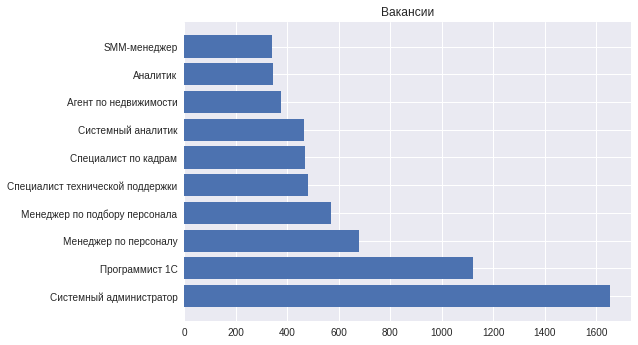

In [ ]:
# Выведем диаграмму вакансий

plt.style.use('seaborn')
plt.title('Вакансии')
plt.barh(df['name'].value_counts()[0:10].index, df['name'].value_counts()[0:10].values)
plt.show()

В перечне вакансий присутствуют вакансии не имеющие отношения к IT сфере

## Город вакансии

In [ ]:
# Преобразуем строковый тип данных в словарь

df['area'] = df['area'].apply(eval)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Выбираем из словаря название города

df['city']= df['area'].apply(lambda row: row['name'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# ТОП 10 городов по количеству вакансий

df['city'].value_counts()[:10]

Москва             19884
Санкт-Петербург     8212
Екатеринбург        2422
Новосибирск         2412
Казань              1927
Краснодар           1705
Нижний Новгород     1645
Ростов-на-Дону      1407
Воронеж             1177
Самара              1141
Name: city, dtype: int64

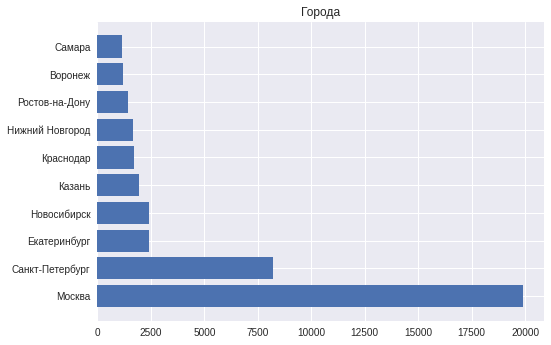

In [ ]:
# Выведем диаграмму городов

plt.style.use('seaborn')
plt.title('Города')
plt.barh(df['city'].value_counts()[:10].index, df['city'].value_counts()[:10].values)
plt.show()

Большая часть вакансий в городах Москва и Санкт-Петербург

## Регион вакансии

In [ ]:
# ТОП 10 регионов по количеству вакансий

df['region'].value_counts()[:10]

Москва                   19884
Санкт-Петербург           8212
Краснодарский край        3163
Свердловская область      2625
Новосибирская область     2469
Республика Татарстан      2448
Московская область        2337
Нижегородская область     1783
Ростовская область        1702
Самарская область         1448
Name: region, dtype: int64

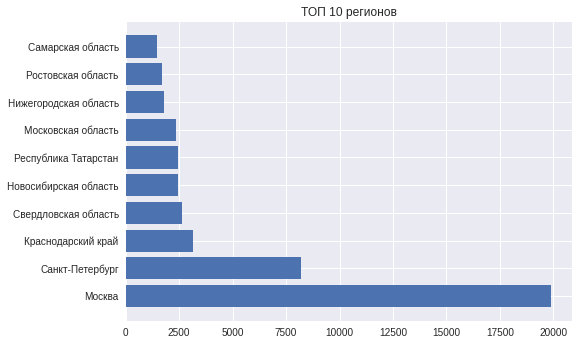

In [ ]:
# Выведем диаграмму регионов

plt.style.use('seaborn')
plt.title('ТОП 10 регионов')
plt.barh(df['region'].value_counts()[:10].index, df['region'].value_counts()[:10].values)
plt.show()

## Заработная плата

In [ ]:
# Преобразуем строковый тип данных в словари

def str_dict(row):
  try:
    n = eval(row) 
    return n
  except:
    return np.nan
df['salary'] = df['salary'].apply(str_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Запишем в функции извлечения значений из словаря:

In [ ]:
# Для колонки зарплата 'от'

def sal_from(quant): # salary_from
  try:
    n = quant['from'] 
    return n
  except:
    return np.nan

In [ ]:
# Для колонки зарплата 'до'

def sal_to(quant): # salary_to
  try:
    n = quant['to'] 
    return n
  except:
    return np.nan

In [ ]:
# Для колонки валюта

def sal_curr(quant): # currency
  try:
    n = quant['currency'] 
    return n
  except:
    return np.nan

In [ ]:
# Для колонки зарплата гросс

def sal_gross(quant): # gross
  try:
    n = quant['gross'] 
    return n
  except:
    return np.nan

In [ ]:
# Разберем извлеченные значения по колонкам

df['salary_from'] = df['salary'].apply(sal_from)
df['salary_to'] = df['salary'].apply(sal_to)
df['currency'] = df['salary'].apply(sal_curr)
df['gross'] = df['salary'].apply(sal_gross)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
# Конвертируем валюты

exchange = {'RUR': 1, 'USD': 59.4, 'EUR': 58.06, 'KZT': 0.1257}  # Подготовим словарь с курсом обмена к рублю

# Конвертация

df['salary_from'] = df['currency'].map(exchange) * df['salary_from']
df['salary_to'] = df['currency'].map(exchange) * df['salary_to']

# Меняем значение валюты после конвертации на "RUR"

df['currency'] = df['currency'].apply(lambda n: 'RUR' if n in exchange else n)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [ ]:
# Создадим функции пересчета зарплат из gross в net

mask_gross = df['gross'] == True # Создаем фильтр для зарплат гросс

# 'salary_from'
def gross_from():
    df.loc[(mask_gross), 'salary_from'] = df[mask_gross]['salary_from'] * 0.87
    
# 'salary_to'
def gross_to():
  try:
    df.loc[(mask_gross), 'salary_to'] = df[mask_gross]['salary_to'] * 0.87
  except:
    np.nan

In [ ]:
# Пересчитаем

gross_from()
gross_to()

# Меняем значение "gross" после персчета
df.loc[(mask_gross), 'gross'] = False

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
# Посчитаем стреднее значение зарплаты по каждой позиции в одтельный столбец

df['salary_mean'] = df[['salary_from', 'salary_to']].mean(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Проверим распределение зарплаты

df['salary_mean'].describe().astype(int)

count      37487
mean       92570
std        99723
min           20
25%        40000
50%        65000
75%       115000
max      5150000
Name: salary_mean, dtype: int64

In [ ]:
# Обрежем значения средней ЗП с 3% процентиля по 97% для устранения выбросов

percentile3 = np.percentile(df['salary_mean'].dropna(), 3) # 3% процентиль
percentile97 = np.percentile(df['salary_mean'].dropna(), 97) # 97% процентиль
df = df.drop(df.loc[(df['salary_mean'] < percentile3) | (df['salary_mean'] > percentile97)].index)

In [ ]:
df['salary_mean'].describe().astype(int)

count     35301
mean      83581
std       56344
min       17400
25%       40020
50%       65000
75%      110000
max      295800
Name: salary_mean, dtype: int64

(-0.5, 0.5, 3480.0, 300000.0)

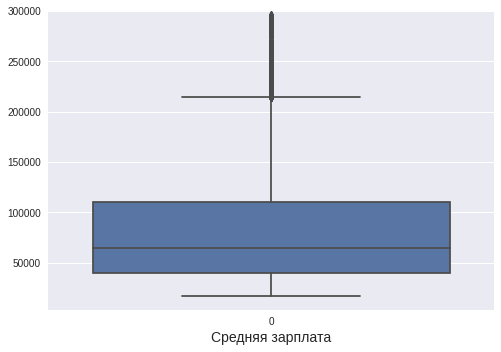

In [ ]:
# Построим график Boxplot для средней зарплаты по всем вакансиям

plt.style.use('seaborn')
k = sns.boxplot(data=df['salary_mean'])
k.set_xlabel("Средняя зарплата", fontsize=14)
plt.axis(ymax= 300000)

Среднее значение ЗП = 83581р выше медианного = 65000р за счет большого количества выбросов

## Компания работодатель

In [ ]:
# Преобразуем строковый тип данных в словарь

def emp_name(row):
  try:
    n = eval(row) 
    x = n['name'] # Выбираем название компании из словаря
    return x
  except:
    return ''

# Переносим название работодателя в новый столбец
df['emp_name'] = df['employer'].apply(emp_name)

In [ ]:
# Выводим ТОП 10 работодателей по числу вакансий

df['emp_name'].value_counts()[:10]

Яндекс           1108
Газпром нефть     587
Сбербанк          546
Тинькофф          489
Ростелеком        470
МТС               366
ИК СИБИНТЕК       348
Ozon              280
VK                250
Первый Бит        232
Name: emp_name, dtype: int64

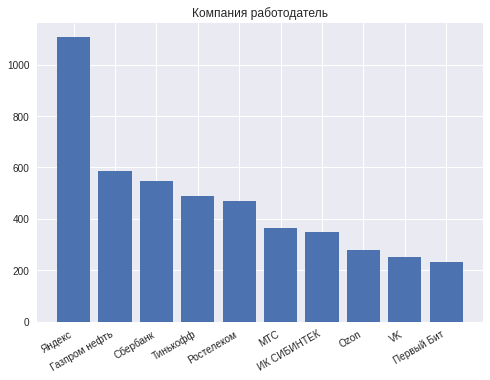

In [ ]:
# Диаграма ТОП 10 работодателей

plt.style.use('seaborn')
plt.title('Компания работодатель')
plt.bar(df['emp_name'].value_counts()[:10].index, df['emp_name'].value_counts()[:10].values)
plt.xticks(rotation=30, ha='right')
plt.show()

Топовый работодатель с отрывом - Яндекс

## График работы

In [ ]:
# Преобразуем строковый тип данных в словарь

def shed_name(row):
  try:
    n = eval(row) 
    x = n['name'] # Выбираем название графика работы из словаря
    return x
  except:
    return ''

# Переносим название в новый столбец
df['shed_name'] = df['schedule'].apply(shed_name)

In [ ]:
# Значения графика работы

df['shed_name'].value_counts()

Полный день         51933
Удаленная работа    10021
Гибкий график        3751
Сменный график       1308
Вахтовый метод        224
Name: shed_name, dtype: int64

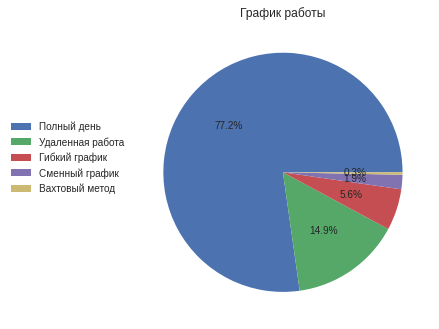

In [ ]:
# Построим круговую диаграмму опыта работы

plt.style.use('seaborn')
plt.title('График работы')
plt.pie(df['shed_name'].value_counts().values, autopct='%0.1f%%')
plt.legend(bbox_to_anchor = (-0.25, 0.45, 0.25, 0.25), labels = df['shed_name'].value_counts().index)
plt.show()

Преимущественное требование в вакансиях к графику работы - Полный рабочий день

## Опыт работы

In [ ]:
# Преобразуем строковый тип данных в словарь

df['experience'] = df['experience'].apply(eval)

In [ ]:
# Выбираем название опыта работы из словаря

df['exp_name'] = df['experience'].apply(lambda row: row['name'])

In [ ]:
# Значения требуемого опыта работы

df['exp_name'].value_counts()

От 1 года до 3 лет    34529
От 3 до 6 лет         19304
Нет опыта             11319
Более 6 лет            2085
Name: exp_name, dtype: int64

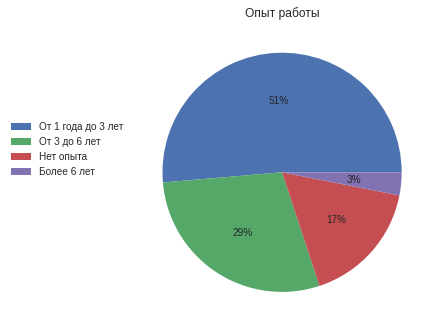

In [ ]:
# Построим круговую диаграмму опыта работы

plt.style.use('seaborn')
plt.title('Опыт работы')
plt.pie(df['exp_name'].value_counts().values, autopct='%1.0f%%')
plt.legend(bbox_to_anchor = (-0.25, 0.45, 0.25, 0.25), labels = df['exp_name'].value_counts().index)
plt.show()

Наиболее востребованны специалисты с опытом работы от 1 года до 6 лет

## Ключевые навыки

In [ ]:
# Создадим функцию преобразования строки в список ключевых навыков

def skills_name(row):
  try:
    lst = []
    n = eval(row) # преобразуем строку в список словарей
    for i in n:
      lst.append(i['name']) # Извлекаем названия навыков из словарей и добавляем их в новый список
    return lst
  except:
    return []

# Применяем список в новый столбец

df['skill_name'] = df['key_skills'].apply(skills_name)

In [ ]:
# Разворачиваем значения в столбце ключевых навыков
dx_skl = df.explode('skill_name')

# Выводим ТОП 10 ключевых навыков
dx_skl['skill_name'].value_counts()[:10]

SQL                     6287
Linux                   4836
Git                     4439
Английский язык         3874
Работа в команде        3421
Управление проектами    3412
Python                  3140
JavaScript              2684
1С программирование     2581
PostgreSQL              2466
Name: skill_name, dtype: int64

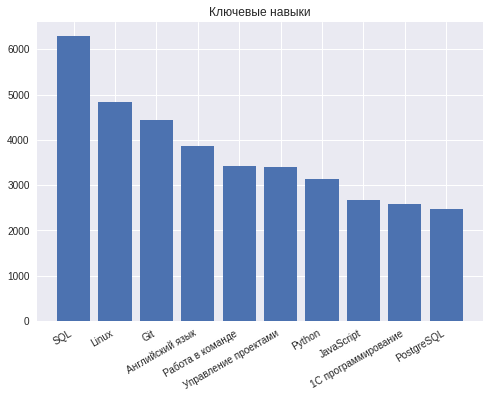

In [ ]:
# Диаграма ТОП 10 скилов

plt.style.use('seaborn')
plt.title('Ключевые навыки')
plt.bar(dx_skl['skill_name'].value_counts()[:10].index, dx_skl['skill_name'].value_counts()[:10].values)
plt.xticks(rotation=30, ha='right')
plt.show()

Самые популярные Hard-skills: знание SQL, Linux, Git, Python

## Специальности и проф область

In [ ]:
# Создадим функцию извлечения названия специальности в новый список

def sp_name(row):
  try:
    lst = []
    n = eval(row) # преобразуем строку в список словарей
    for i in n:
      lst.append(i['name']) # Извлекаем названия специальностей из словарей и добавляем их в новый список
    return lst
  except:
    return []

# Применяем список в новый столбец
df['sp_name'] = df['specializations'].apply(sp_name)

In [ ]:
# Создадим функцию извлечения названия профессиональной области в новый список

def sp_pname(row):
  try:
    lst = []
    n = eval(row) # преобразуем строку в список словарей
    for i in n:
      lst.append(i['profarea_name']) # Извлекаем названия профессиональной области из словарей и добавляем их в новый список
    return lst
  except:
    return []

# Применяем список в новый столбец
df['sp_pname'] = df['specializations'].apply(sp_pname)

In [ ]:
# Развернем значения в столбцах специальности и проф область

dx_sp = df.explode('sp_name')
dx_prf = df.explode('sp_pname')

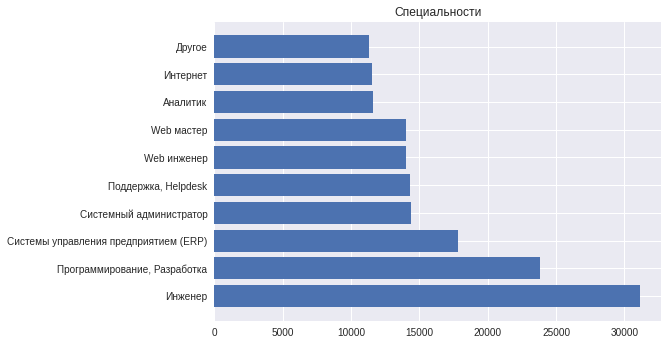

In [ ]:
# Диаграма ТОП 10 специцальностей

plt.style.use('seaborn')
plt.title('Специальности')
plt.barh(dx_sp['sp_name'].value_counts()[:10].index, dx_sp['sp_name'].value_counts()[:10].values)
plt.show()

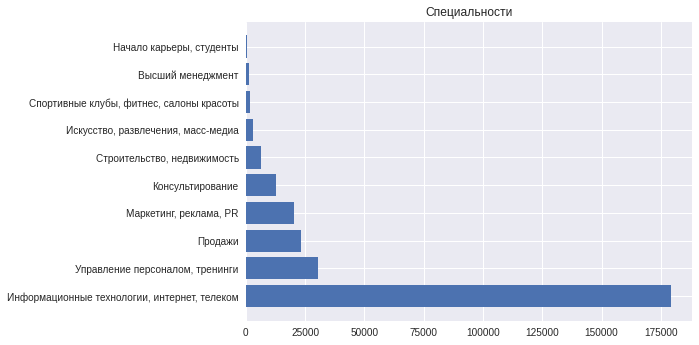

In [ ]:
# Диаграма ТОП 10 проф областей

plt.style.use('seaborn')
plt.title('Специальности')
plt.barh(dx_prf['sp_pname'].value_counts()[:10].index, dx_prf['sp_pname'].value_counts()[:10].values)
plt.show()

> Уберем из датасета вакансии по профессиональным областям, не имеющим отношения к IT сфере

In [ ]:
# Создадим фильтр по содержанию проф области "Информационные технологии, интернет, телеком"
it = df['sp_pname'].apply(lambda row: 'Информационные технологии, интернет, телеком' in row)

# Применим фильтр к датасету
df = df[it]

## Итоговый обработанный датасет

In [ ]:
df.columns

Index(['name', 'area', 'region', 'salary', 'employer', 'schedule',
       'experience', 'key_skills', 'specializations', 'city', 'salary_from',
       'salary_to', 'currency', 'gross', 'salary_mean', 'emp_name',
       'shed_name', 'exp_name', 'skill_name', 'sp_name', 'sp_pname'],
      dtype='object')

In [ ]:
# Составим копию датасета из преобразованных данных

df_clr = df[['name', 'city', 'region', 'salary_from', 'salary_to', 'salary_mean', 'exp_name', 'shed_name', 'skill_name', 'sp_name', 'sp_pname', 'emp_name']]
df_clr.sample(4)

,name,city,region,salary_from,salary_to,salary_mean,exp_name,shed_name,skill_name,sp_name,sp_pname,emp_name
37888,Java-разработчик,Тюмень,Тюменская область,NaN,NaN,NaN,От 3 до 6 лет,Полный день,"[Spring Framework, Git, Java, Apache Maven, Re...","[Программирование, Разработка, Системы управле...","[Информационные технологии, интернет, телеком,...",НОВАТЭК
33121,Аналитик (интеграция),Красноярск,Красноярский край,NaN,NaN,NaN,От 1 года до 3 лет,Удаленная работа,"[UML, SQL, Системный анализ, Английский язык, ...","[Другое, Аналитик, Аналитик, Другое]","[Продажи, Информационные технологии, интернет,...","РУСАЛ, Центр подбора персонала"
11685,QA Security Engineer / Pentester,Москва,Москва,220000.0,NaN,220000.0,От 1 года до 3 лет,Удаленная работа,"[Linux, Java, Английский язык, REST, AWS, OWAS...","[Компьютерная безопасность, Сетевые технологии...","[Информационные технологии, интернет, телеком,...",Лидекс Системс
68624,Специалист отдела информационных систем и ресу...,Кемерово,Кемеровская область,30000.0,40000.0,35000.0,Нет опыта,Полный день,[],"[Компьютерная безопасность, Сетевые технологии...","[Информационные технологии, интернет, телеком,...",ГКУ ЦИТ КУЗБАССА


# 3. Взаимосвязь колонок

## Связь двух числовых переменных

In [ ]:
ds_to = df[df['salary_to'].notna()]

In [ ]:
ds_to[['salary_from', 'salary_to']].describe().astype(int)

,salary_from,salary_to
count,9048,11356
mean,73983,111268
std,48851,75199
min,30,17400
25%,38000,50000
50%,60000,87000
75%,100000,150000
max,290300,500000


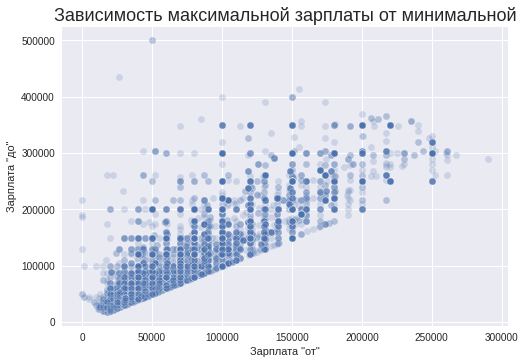

In [ ]:
scp = sns.scatterplot(x=ds_to["salary_from"], y=ds_to["salary_to"], alpha=0.2)
scp.set_title('Зависимость максимальной зарплаты от минимальной', fontsize=18)
scp.set_xlabel('Зарплата "от"')
scp.set_ylabel('Зарплата "до"')
plt.show()

На графике визуально наблюдается зависимость максимальной зарплаты от минимальной

## Связь числовой и категориальной переменной

> Взаимосвязь опыта работы и средней зарплаты

In [ ]:
# Сгруппируем значения средней ЗП по опыту работы

exp_describe = df.groupby('exp_name')['salary_mean']
exp_describe.describe().astype(int)

,count,mean,std,min,25%,50%,75%,max
exp_name,,,,,,,,
Более 6 лет,474,142361,64193,20000,90000,135000,197850,295800
Нет опыта,3390,44991,28055,17400,27000,36975,52200,270000
От 1 года до 3 лет,11656,81195,49992,17400,44193,67194,100000,290000
От 3 до 6 лет,5632,129049,64060,17400,78300,120000,174000,295800


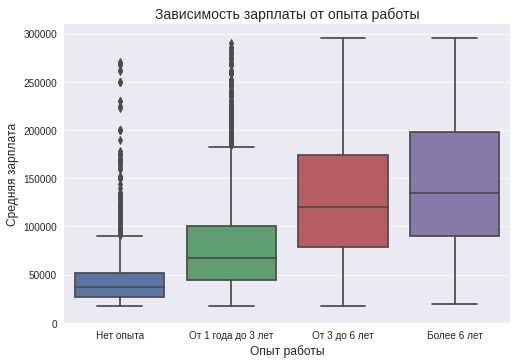

In [ ]:
# Выведем график boxplot средних зарплат по всем группам опыта

grs = sns.boxplot(x='exp_name', y='salary_mean', data=df)
plt.axis(ymin = 0, ymax = 310000)
grs.axes.set_title('Зависимость зарплаты от опыта работы' , fontsize=14)
grs.set_xlabel('Опыт работы', fontsize=12)
grs.set_ylabel('Средняя зарплата', fontsize=12)
plt.show()

Визуально наблюдается рост средних значений ЗП с ростом опыта работы

> Взаимосвязь графика работы и средней зарплаты

In [ ]:
# Сгруппируем значения средней ЗП по графику работы

shed_describe = df.groupby('shed_name')['salary_mean']
shed_describe.describe().astype(int)

,count,mean,std,min,25%,50%,75%,max
shed_name,,,,,,,,
Вахтовый метод,51,117232,52165,40000,64195,130000,147500,252950
Гибкий график,742,107375,64645,17400,52200,100000,150000,286230
Полный день,15669,83902,54144,17400,43500,69600,107000,295800
Сменный график,574,52196,23423,19575,34800,45000,65000,190000
Удаленная работа,4116,112474,71926,17400,43500,100000,165000,295800


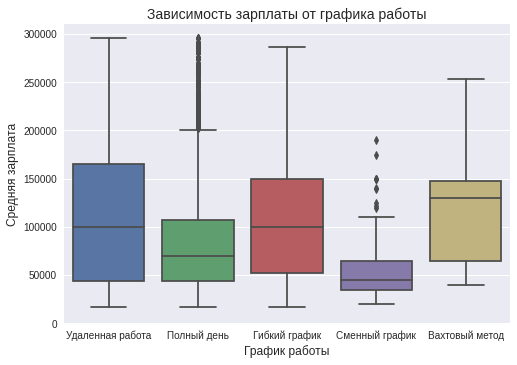

In [ ]:
# Выведем график boxplot средних зарплат по всем группам опыта

grs = sns.boxplot(x='shed_name', y='salary_mean', data=df)
plt.axis(ymin = 0, ymax = 310000)
grs.axes.set_title('Зависимость зарплаты от графика работы' , fontsize=14)
grs.set_xlabel('График работы', fontsize=12)
grs.set_ylabel('Средняя зарплата', fontsize=12)
plt.show()

## Связь двух категориальных переменных

In [ ]:
# Выведем ТОП 5 ключевых навыков

dx_skl['skill_name'].value_counts()[:5]

SQL                 6287
Linux               4836
Git                 4439
Английский язык     3874
Работа в команде    3421
Name: skill_name, dtype: int64

In [ ]:
# Сформируем список из названий ТОП 5 ключевых навыков

top_label = list(dx_skl['skill_name'].value_counts()[:5].index)

In [ ]:
df_top5_skills = dx_skl[dx_skl['skill_name'].isin(top_label)]

In [ ]:
# Сформируем список из значений опыта работы

exp_list = df_top5_skills['exp_name'].unique()

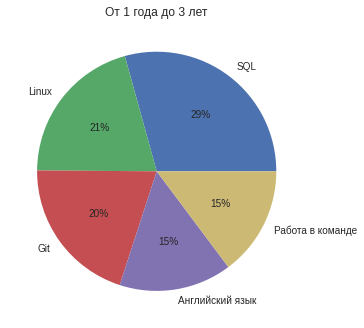

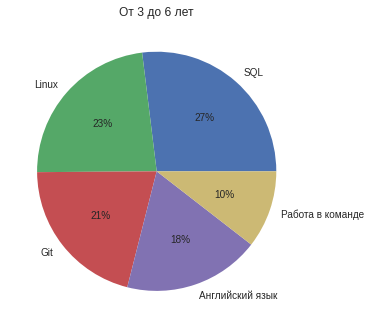

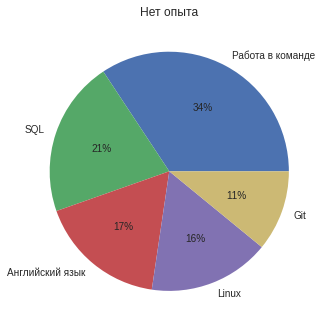

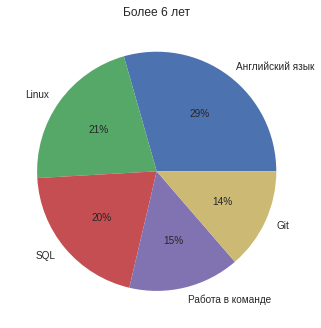

In [ ]:
# Выведем диаграммы ключевых навыков в зависимости от опыта работы

for i in exp_list:
  n = df_top5_skills[df_top5_skills['exp_name'] == i]
  top_sk = n['skill_name'].value_counts()
  plt.title(i)
  plt.pie(top_sk.values, labels=top_sk.index, autopct='%1.0f%%')
  plt.show()

По мере увеличения опыта работы, меняются и требуемые ключевые навыки специалиста

#  ВЫВОДЫ ИССЛЕДОВАНИЯ:

В результате проведенной работы ответили на все вопросы задания по разделу стажировки EDA:

1. Изучили датасет, определил его размер. Нашел повторяющиеся строки и удалил. Определил количество пропусков по определенным столбцам
2. Выбрали необходимые для анализа колонки (столбцы) таблицы
3. Привели все колонки к типу данных, удобных для анализа, обработали пропуски. По нечисловым данным выяснили топ 10 значений в каждой колонке, по числовым describe основных статистических показателей.
4. Построили графики по ключевым показателям каждой колонки, а также их взаимосвязям

Сделали следующие выводы:

1) Самыми востребованными вакансиями являются Системный администратор, Программист 1С, Специалист технической поддержки

2) Значения средней зарплаты по всем вакансиям составляют 83581 руб. Медианное значение равно 65 000 руб. Заметное отклонение среднего показателя от медианного обусловлено большим количеством выбросов.

3) Наиболее востребованными специалистами являются специалисты с опытом работы от 1 года до 6-ти лет.

4) Наибольшее количество вакансий с графиком на полный день работы, хотя наиболее оплачиваемые графики работы - удаленно и гибкий график

5) Самые популярные Hard-skills: знание SQL, Linux, Git, Python

6) По количеству вакансий компания работодатель лидирует с заметным отрывом от остальных компаний

7) С помощью графического анализа определили связь минимальной зарплаты с максимальной, а также различие в топ 5 ключевых навыков для разного опыта работы

In [ ]:
writer = pd.ExcelWriter('file.xlsx') # write dataframe to excel 
df_clr.to_excel(writer) # save the excel 
writer.save()